# Assignment 3: Exploring Tree-Based Regression Methods for 3D Sinusoidal Data
## DTSC 680: Applied Machine Learning

## Name: 

## Directions and Overview

The main purpose of this assignment is for you to gain experience using tree-based methods to solve simple regression problems.  In this assignment, you will fit a `Gradient-Boosted Regression Tree`, a `Random Forest`, and a `Decision Tree` to a noisy 3D sinusoidal data set.  Since these models can be trained very quickly on the supplied data, I want you to first manually adjust hyperparameter values and observe their influence on the model's predictions.  That is, you should manually sweep the hyperparameter space and try to hone in on the optimal hyperparameter values, again, _manually_.  (Yep, that means guess-and-check: pick some values, train the model, observe the prediction curve, repeat.)

But wait, there's more! Merely attempting to identify the optimal hyperparameter values is not enough.  Be sure to really get a visceral understanding of how altering a hyperparameter in turn alters the model predictions (i.e. the prediction curve).  This is how you will build your machine learning intuition!

So, play around and build some models.  When you are done playing with hyperparameter values, you should try to set these values to the optimal values manually (you're likely going to be _way_ off).  Then, retrain the model.  Next in this assignment, we will perform several grid searches, so you'll be able to compare your "optimal" hyperparameter values with those computed from the grid search.

We will visualize model predictions for the optimal `Gradient-Boosted Regression Tree`, a `Random Forest`, and `Decision Tree` models that were determined by the grid searches.  Next, you will compute the generalization error on the test set for the three models.

## Preliminaries

Let's import some common packages:

In [1]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def plot3Ddata(data_df):
    
    pass

def plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z):
    
    pass


# Import and Split Data

Complete the following:



1. Begin by importing the data from the file called `3DSinusoidal.csv`.  Name the returned DataFrame `data`. 

2. Call [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with a `test_size` of 20%.  `x` and `y` will be your feature data and `z` will be your response data. Save the output into `X_train`, `X_test`, `z_train`, and `z_test`, respectively.  Specify the `random_state` parameter to be `42` (do this throughout the entire note book).

In [2]:
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('3DSinusoidal .csv')


X = data.drop('z', axis=1)
y = data['z'] 

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\Haneef\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Plot Data

Simply plot your training data here, so that you know what you are working with.  You must define a function called `plot3Ddata`, which accepts a Pandas DataFrame (composed of 3 spatial coordinates) and uses `scatter3D()` to plot the data.  Use this function to plot only the training data (recall that you don't even want to look at the test set, until you are ready to calculate the generalization error).  You must place the definition of this function in the existing code cell of the above __Preliminaries__ section, and have nothing other than the function invocation in the below cell. 

You must emulate the graphs shown in the respective sections below. Each of the graphs will have four subplots. Note the various viewing angles that each subplot presents - you can achieve this with the view_init() method. Be sure to label your axes as shown.

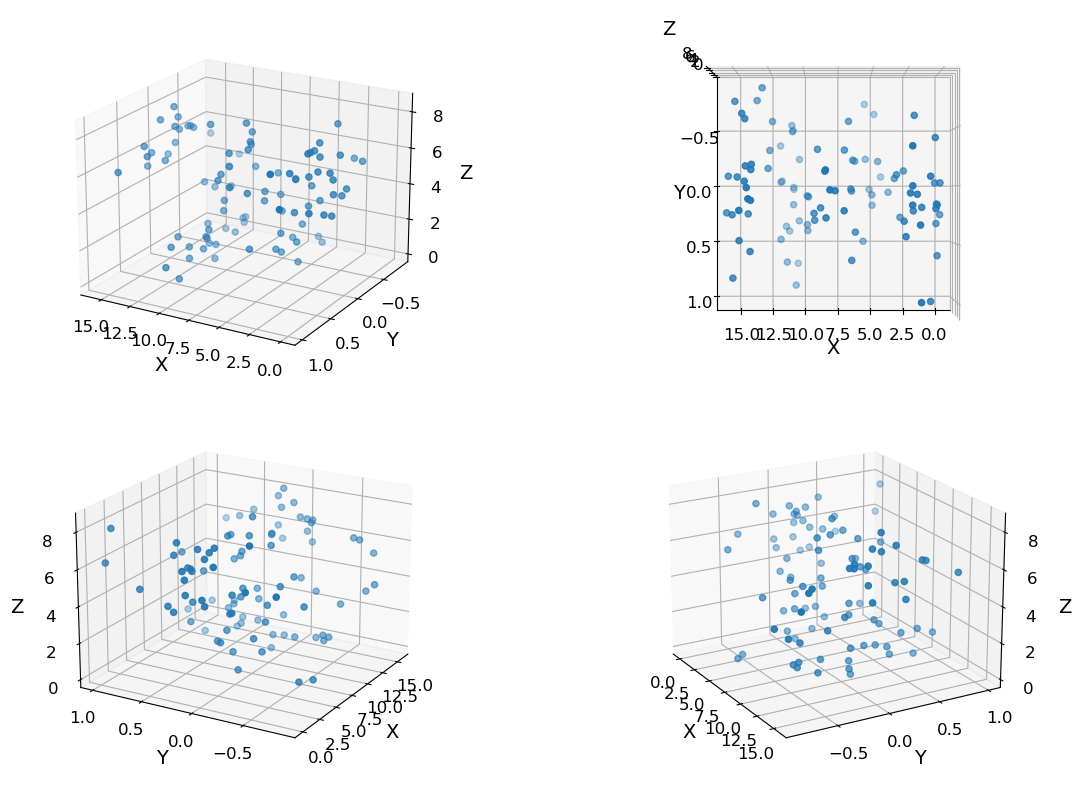

In [3]:

train_df = pd.concat([X_train, y_train.rename('z')], axis=1)
from mpl_toolkits.mplot3d import Axes3D

# Define the plot3Ddata function that takes a DataFrame with 3 columns (x, y, z) as input
def plot3Ddata(data_df):
    fig = plt.figure(figsize=(14, 8))

    # Subplot 1
    ax1 = fig.add_subplot(221, projection='3d')
    ax1.scatter3D(data_df.iloc[:, 0], data_df.iloc[:, 1], data_df.iloc[:, 2])
    ax1.view_init(elev=20., azim=120)
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')

    # Subplot 2
    ax2 = fig.add_subplot(222, projection='3d')
    ax2.scatter3D(data_df.iloc[:, 0], data_df.iloc[:, 1], data_df.iloc[:, 2])
    ax2.view_init(elev=90., azim=90)
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')

    # Subplot 3
    ax3 = fig.add_subplot(223, projection='3d')
    ax3.scatter3D(data_df.iloc[:, 0], data_df.iloc[:, 1], data_df.iloc[:, 2])
    ax3.view_init(elev=20., azim=210)
    ax3.set_xlabel('X')
    ax3.set_ylabel('Y')
    ax3.set_zlabel('Z')

    # Subplot 4
    ax4 = fig.add_subplot(224, projection='3d')
    ax4.scatter3D(data_df.iloc[:, 0], data_df.iloc[:, 1], data_df.iloc[:, 2])
    ax4.view_init(elev=20., azim=330)
    ax4.set_xlabel('X')
    ax4.set_ylabel('Y')
    ax4.set_zlabel('Z')

    # Adjust layout
    plt.tight_layout()
    plt.show()

plot3Ddata(train_df)


## A Quick Note

In the following sections you will be asked to plot the training data along with the model's predictions for that data superimposed on it.  You must write a function called `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` that will plot this figure.  The function accepts six parameters as input, shown in the function signature.  All six input parameters must be NumPy arrays. The Numpy arrays called fit_x and fit_y represent the x and y coordinates from the training data and fit_z represents the model predictions from those coordinates (i.e. the prediction curve). The three Numpy arrays called `scat_x, scat_y,` and  `scat_z` represent the x, y, and z coordinates of the training data.   

You must place the definition of the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function in the existing code cell of the above __Preliminaries__ section. (The function header is already there - you must complete the function definition.)

You will use the `plotscatter3Ddata()` function in each of the below __Plot Model Predictions for Training Set__ portion of the three __Explore 3D Data__ sections, as well as the __Visualize Optimal Model Predictions__ section.

___Important: Below, you will be asked to plot the model's prediction curve along with the training data.  Even if you correctly train the model, you may find that your trendline is very ugly when you first plot it.  If this happens to you, try plotting the model's predictions using a scatter plot rather than a connected line plot.  You should be able to infer the problem and solution with the trendline from examining this new scatter plot of the model's predictions. All of your plots, however, should be connected line plots when submitted. Please refer to the FAQ document for more clarity.___

Note: You must use the supplied data and not np.linspace() to create the prediction curve.

# Explore 3D Data: GradientBoostingRegressor

Fit a `GradientBoostingRegressor` model to this data.  You must manually assign values to the following hyperparameters.  You should "play around" by using different combinations of hyperparameter values to really get a feel for how they affect the model's predictions.  Update the below bullets accordingly.  When you are done playing, set these to the best values you can for submission.  Update the below bullets accordingly.  (It is totally fine if you don't elucidate the optimal values here; however, you will want to make sure your model is not excessively overfitting or underfitting the data.  Do this by examining the prediction curve generated by your model.  You will be graded, more exactly, on the values that you calculate later from performing several rounds of grid searches.)

Values "played around with":
 - `learning_rate = <0.02,0.05,0.1, 0.2>`
 - `max_depth = <2,3,4,5>`
 - `n_estimators = <50,100,200,300>`
 - `random_state = 42`

Initial "best values":
 - `learning_rate = <0.2>`
 - `max_depth = <5>`
 - `n_estimators = <300>`
 - `random_state = 42`

In [4]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


learning_rates = [0.01, 0.05, 0.1, 0.2]
max_depths = [2, 3, 4, 5]
n_estimatorss = [50, 100, 200, 300]

# Store the best model's parameters and error
best_lr = None
best_depth = None
best_n_estimators = None
best_error = float('inf')
best_model = None

# Loop over all possible combinations of hyperparameters
for lr in learning_rates:
    for depth in max_depths:
        for n_estimators in n_estimatorss:
            # Create the Gradient Boosting Regressor model with current set of hyperparameters
            gb_reg = GradientBoostingRegressor(learning_rate=lr,
                                               max_depth=depth,
                                               n_estimators=n_estimators,
                                               random_state=42)
            # Fit the model to the training data
            gb_reg.fit(X_train, y_train)
            
            # Predict on the training set
            y_train_pred = gb_reg.predict(X_train)
            
            # Calculate mean squared error on the training set
            mse = mean_squared_error(y_train, y_train_pred)
            
            # Print the hyperparameters and corresponding MSE
            print(f"LR: {lr}, Depth: {depth}, Estimators: {n_estimators}, MSE: {mse}")
            
            # Update the best parameters if the current model is better
            if mse < best_error:
                best_lr = lr
                best_depth = depth
                best_n_estimators = n_estimators
                best_error = mse
                best_model = gb_reg

# Output the best set of parameters
print(f"Best parameters - LR: {best_lr}, Depth: {best_depth}, Estimators: {best_n_estimators}, MSE: {best_error}")


LR: 0.01, Depth: 2, Estimators: 50, MSE: 3.648789638161633
LR: 0.01, Depth: 2, Estimators: 100, MSE: 2.483311365693112
LR: 0.01, Depth: 2, Estimators: 200, MSE: 1.419978241234967
LR: 0.01, Depth: 2, Estimators: 300, MSE: 0.986921246978228
LR: 0.01, Depth: 3, Estimators: 50, MSE: 3.0963818589505663
LR: 0.01, Depth: 3, Estimators: 100, MSE: 1.9837660076848538
LR: 0.01, Depth: 3, Estimators: 200, MSE: 0.8986028620847648
LR: 0.01, Depth: 3, Estimators: 300, MSE: 0.4601724237943328
LR: 0.01, Depth: 4, Estimators: 50, MSE: 2.3775759521932156
LR: 0.01, Depth: 4, Estimators: 100, MSE: 1.155402398767225
LR: 0.01, Depth: 4, Estimators: 200, MSE: 0.35412760529858356
LR: 0.01, Depth: 4, Estimators: 300, MSE: 0.16478896839586768
LR: 0.01, Depth: 5, Estimators: 50, MSE: 2.1801164561523247
LR: 0.01, Depth: 5, Estimators: 100, MSE: 0.9460570910654451
LR: 0.01, Depth: 5, Estimators: 200, MSE: 0.23292730161109565
LR: 0.01, Depth: 5, Estimators: 300, MSE: 0.07837995366263098
LR: 0.05, Depth: 2, Estimator

### Plot Model Predictions for Training Set

Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.

In [5]:
def plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the model predictions as a surface plot
    ax.plot(fit_x, fit_y, fit_z, color='r', label='Model Prediction')

    # Scatter plot of the actual training data
    ax.scatter(scat_x, scat_y, scat_z, color='b', label='Training Data')

    # Labeling axes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Legend
    ax.legend()

    plt.tight_layout()
    plt.show()


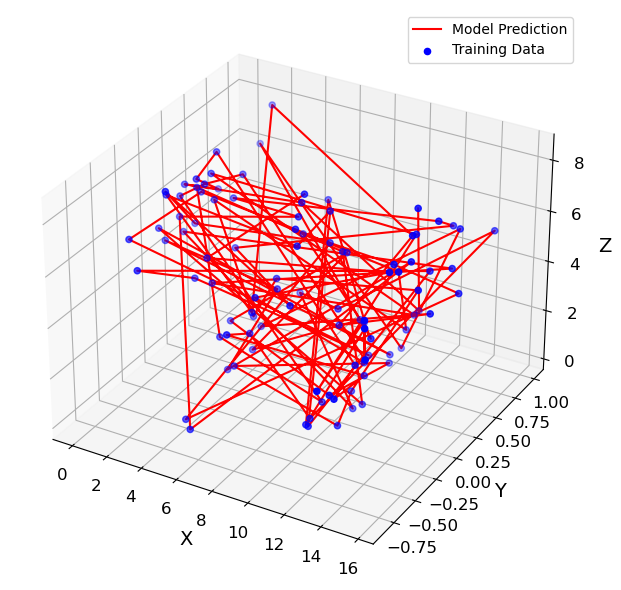

In [6]:
import numpy as np


# 

# 
scat_x = X_train.iloc[:, 0].values  # x-coordinates of the training data
scat_y = X_train.iloc[:, 1].values  # y-coordinates of the training data
scat_z = y_train.values             # Actual z-values (targets) 

# Use the model to predict z values based on the training data
fit_z = gb_reg.predict(X_train)  # Model's predictions

# Since the function expects all parameters to be numpy arrays, ensure they are correctly formatted
# 

# 
plotscatter3Ddata(scat_x, scat_y, fit_z, scat_x, scat_y, scat_z)


# Explore 3D Data: RandomForestRegressor

Fit a `RandomForestRegressor` model to this data.  You must manually assign values to the following hyperparameters.  You should "play around" by using different combinations of hyperparameter values to really get a feel for how they affect the model's predictions.  Update the below bullets accordingly.  When you are done playing, set these to the best values you can for submission.  Update the below bullets accordingly.  (It is totally fine if you don't elucidate the optimal values here; however, you will want to make sure your model is not excessively overfitting or underfitting the data.  Do this by examining the prediction curve generated by your model.  You will be graded, more exactly, on the values that you calculate later from performing several rounds of grid searches.)

Values "played around with":
 - `min_samples_split = <2, 4, 6, 10>`
 - `max_depth = <None, 5, 10, 20>`
 - `n_estimators = <10, 50, 100, 200>`
 - `random_state = 42`

Initial "best values":
 - `min_samples_split = <2>`
 - `max_depth = <None>`
 - `n_estimators = <100>`
 - `random_state = 42`

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

min_samples_splits = [2, 4, 6, 10]
max_depths = [None, 5, 10, 20]
n_estimatorss = [10, 50, 100, 200]

# Store the best model's parameters and error
best_min_samples_split = None
best_max_depth = None
best_n_estimators = None
best_error = float('inf')
best_model = None

# Loop over all possible combinations of hyperparameters
for min_samples_split in min_samples_splits:
    for max_depth in max_depths:
        for n_estimators in n_estimatorss:
            # Create the RandomForestRegressor model with the current set of hyperparameters
            rf_reg = RandomForestRegressor(min_samples_split=min_samples_split,
                                           max_depth=max_depth,
                                           n_estimators=n_estimators,
                                           random_state=42)
            
            # Fit the model to the training data
            rf_reg.fit(X_train, y_train)
            
            # Predict on the training set
            y_train_pred = rf_reg.predict(X_train)
            
            # Calculate mean squared error on the training set
            mse = mean_squared_error(y_train, y_train_pred)
            
            # Print the hyperparameters and corresponding MSE
            print(f"Min Samples Split: {min_samples_split}, Max Depth: {max_depth}, Estimators: {n_estimators}, MSE: {mse}")
            
            # Update the best parameters if the current model is better
            if mse < best_error:
                best_min_samples_split = min_samples_split
                best_max_depth = max_depth
                best_n_estimators = n_estimators
                best_error = mse
                best_model = rf_reg

# Output the best set of parameters
print(f"Best parameters - Min Samples Split: {best_min_samples_split}, Max Depth: {best_max_depth}, Estimators: {best_n_estimators}, MSE: {best_error}")


Min Samples Split: 2, Max Depth: None, Estimators: 10, MSE: 0.18397056205914752
Min Samples Split: 2, Max Depth: None, Estimators: 50, MSE: 0.11571445919975684
Min Samples Split: 2, Max Depth: None, Estimators: 100, MSE: 0.10755591338318378
Min Samples Split: 2, Max Depth: None, Estimators: 200, MSE: 0.11008870322233415
Min Samples Split: 2, Max Depth: 5, Estimators: 10, MSE: 0.40993777374874457
Min Samples Split: 2, Max Depth: 5, Estimators: 50, MSE: 0.3184566290825506
Min Samples Split: 2, Max Depth: 5, Estimators: 100, MSE: 0.3023439316296819
Min Samples Split: 2, Max Depth: 5, Estimators: 200, MSE: 0.3136795593678039
Min Samples Split: 2, Max Depth: 10, Estimators: 10, MSE: 0.1839690230615161
Min Samples Split: 2, Max Depth: 10, Estimators: 50, MSE: 0.11613816892262627
Min Samples Split: 2, Max Depth: 10, Estimators: 100, MSE: 0.10785030996121274
Min Samples Split: 2, Max Depth: 10, Estimators: 200, MSE: 0.11024550285515215
Min Samples Split: 2, Max Depth: 20, Estimators: 10, MSE: 

### Plot Model Predictions for Training Set

Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.

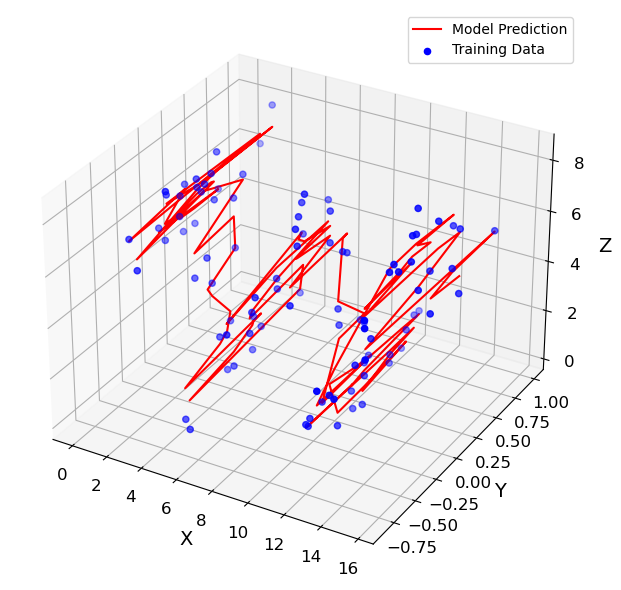

In [8]:
# 
# 

# 
scat_x = X_train.iloc[:, 0].values  #
scat_y = X_train.iloc[:, 1].values  # 
scat_z = y_train.values             # 

# 
fit_z = rf_reg.predict(X_train)

# 
# 
indices = np.argsort(scat_x)  # 
fit_x, fit_y, fit_z = scat_x[indices], scat_y[indices], fit_z[indices]

# Call the plotting function with the prepared data
plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)


# Explore 3D Data: DecisionTreeRegressor

Fit a `DecisionTreeRegressor` model to this data.  You must manually assign values to the following hyperparameters.  You should "play around" by using different combinations of hyperparameter values to really get a feel for how they affect the model's predictions.  Update the below bullets accordingly.  When you are done playing, set these to the best values you can for submission.  Update the below bullets accordingly.  (It is totally fine if you don't elucidate the optimal values here; however, you will want to make sure your model is not excessively overfitting or underfitting the data.  Do this by examining the prediction curve generated by your model.  You will be graded, more exactly, on the values that you calculate later from performing several rounds of grid searches.)

Values "played around with":
 - `splitter = <best, random>`
 - `max_depth = <None, 5 10,15>`
 - `min_samples_split = <2,4,6,8>`
 - `random_state = 42`

Initial "best values":
 - `splitter = <best>`
 - `max_depth = <None>`
 - `min_samples_split = <2>`
 - `random_state = 42`

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
# Define a range of values to experiment with
splitters = ['best', 'random']
max_depths = [None, 5, 10, 15]
min_samples_splits = [2, 4, 6, 8]

# Initialize variables to store the best hyperparameters and their corresponding MSE
best_splitter = None
best_max_depth = None
best_min_samples_split = None
best_mse = float('inf')
best_model = None

# Loop through all combinations of hyperparameters
for splitter in splitters:
    for max_depth in max_depths:
        for min_samples_split in min_samples_splits:
            # Initialize and train the DecisionTreeRegressor model
            dt_reg = DecisionTreeRegressor(splitter=splitter,
                                           max_depth=max_depth,
                                           min_samples_split=min_samples_split,
                                           random_state=42)
            dt_reg.fit(X_train, y_train)
            
            # Predict on the training set
            y_train_pred = dt_reg.predict(X_train)
            
            # Calculate MSE on the training set
            mse = mean_squared_error(y_train, y_train_pred)
            
            # Print the hyperparameters and their corresponding MSE
            print(f"Splitter: {splitter}, Max Depth: {max_depth}, Min Samples Split: {min_samples_split}, MSE: {mse}")
            
            # Update the best hyperparameters if the current model's MSE is lower
            if mse < best_mse:
                best_splitter = splitter
                best_max_depth = max_depth
                best_min_samples_split = min_samples_split
                best_mse = mse
                best_model = dt_reg

# Output the best combination of hyperparameters
print(f"Best hyperparameters - Splitter: {best_splitter}, Max Depth: {best_max_depth}, Min Samples Split: {best_min_samples_split}, MSE: {best_mse}")


Splitter: best, Max Depth: None, Min Samples Split: 2, MSE: 0.0
Splitter: best, Max Depth: None, Min Samples Split: 4, MSE: 0.08714295214624918
Splitter: best, Max Depth: None, Min Samples Split: 6, MSE: 0.18918558660007548
Splitter: best, Max Depth: None, Min Samples Split: 8, MSE: 0.2419904788078905
Splitter: best, Max Depth: 5, Min Samples Split: 2, MSE: 0.517298200718012
Splitter: best, Max Depth: 5, Min Samples Split: 4, MSE: 0.5476066170355915
Splitter: best, Max Depth: 5, Min Samples Split: 6, MSE: 0.5633349949306755
Splitter: best, Max Depth: 5, Min Samples Split: 8, MSE: 0.5767903539332372
Splitter: best, Max Depth: 10, Min Samples Split: 2, MSE: 8.914571938861267e-05
Splitter: best, Max Depth: 10, Min Samples Split: 4, MSE: 0.08714295214624918
Splitter: best, Max Depth: 10, Min Samples Split: 6, MSE: 0.18918558660007548
Splitter: best, Max Depth: 10, Min Samples Split: 8, MSE: 0.2419904788078905
Splitter: best, Max Depth: 15, Min Samples Split: 2, MSE: 0.0
Splitter: best, Max

### Plot Model Predictions for Training Set

Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.

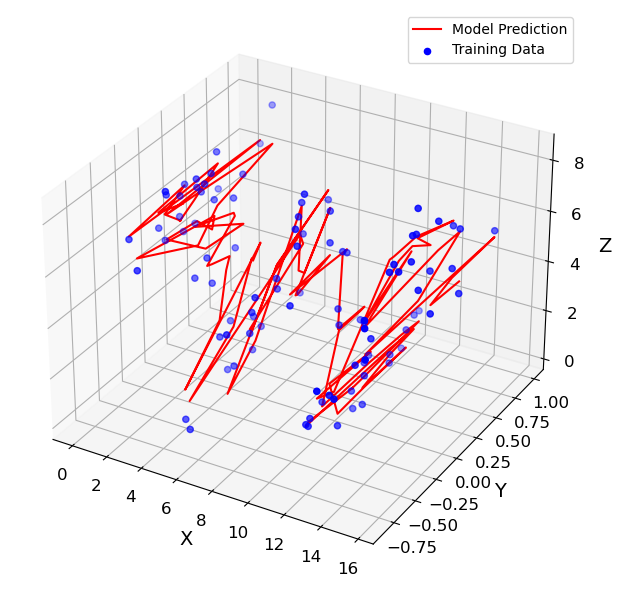

In [10]:
# 
# 
# 

# Prepare the actual training data points
scat_x = X_train.iloc[:, 0].values  # 
scat_y = X_train.iloc[:, 1].values  # 
scat_z = y_train.values             # 

# Predict z-values using the trained model for the same x, y coordinates
fit_z = dt_reg.predict(X_train)

#
indices = np.argsort(scat_x)  # 
fit_x, fit_y, fit_z = scat_x[indices], scat_y[indices], fit_z[indices]

# Now call the plotting function with the prepared data
plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)


# Perform Grid Searches

You will perform a series of grid searches, which will yield the optimal hyperparamter values for each of the three model types.  You can compare the values computed by the grid search with the values you manually found earlier.  How do these compare?

You must perform a course-grained grid search, with a very broad range of values first.  Then, you perform a second grid search using a tighter range of values centered on those identified in the first grid search.  You may have to use another round of grid searching too (it took me at least three rounds of grid searches per model to ascertain the optimal hyperparameter values below).

Note the following:

1. Be sure to clearly report the optimal hyperparameters in the designated location after you calculate them!

2. You must use `random_state=42` everywhere that it is needed in this notebook.

3. You must use grid search to compute the following hyperparameters:

   GradientBoostingRegressor:
    
     - `max_depth = <value>`
     - `n_estimators = <value>`
     - `learning_rate = <value>`

   RandomForestRegressor:
    
     - `max_depth = <value>`
     - `n_estimators = <value>`
     - `min_samples_split = <value>`

   DecisionTreeRegressor:
    
     - `splitter = <value>`
     - `max_depth = <value>`
     - `min_samples_split = <value>`
     
     
4. `learning rate` should be rounded to two decimals.
5. The number of cross-folds. Specify `cv=3`


## Perform Individual Model Grid Searches

In this section you will perform a series of grid searches to compute the optimal hyperparameter values for each of the three model types.

In [11]:
from sklearn.model_selection import GridSearchCV

# -----
# Coarse-Grained GradientBoostingRegressor GridSearch
# -----

from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid
param_grid_gb = {
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize the GridSearchCV object
grid_search_gb = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=param_grid_gb, cv=3, scoring='neg_mean_squared_error')

# Fit it to the data
grid_search_gb.fit(X_train, y_train)

# Best parameters
print("GradientBoostingRegressor best params:", grid_search_gb.best_params_)


GradientBoostingRegressor best params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [12]:
# -----
# Refined GradientBoostingRegressor GridSearch
# -----

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Hypothetical promising ranges identified from the initial grid search
param_grid_gb_refined = {
    'max_depth': [4, 5, 6],  # Narrowed down to around the best value from the coarse search
    'n_estimators': [150, 200, 250],  # Similarly, focus around the best estimator count
    'learning_rate': [0.05, 0.1, 0.15]  # Adjust learning rates to explore around the promising value
}

# Initialize the refined GridSearchCV object
grid_search_gb_refined = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid_gb_refined,
    cv=3,  # Number of cross-validation folds
    scoring='neg_mean_squared_error',
    verbose=1  # Show more information about the progress
)

# Fit the refined grid search to the data
grid_search_gb_refined.fit(X_train, y_train)

# Print the best parameters and best score (MSE) from the refined search
print("Refined GradientBoostingRegressor best params:", grid_search_gb_refined.best_params_)
print("Best score (negative MSE):", grid_search_gb_refined.best_score_)

# Extract the best estimator directly
best_gb_model = grid_search_gb_refined.best_estimator_


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Refined GradientBoostingRegressor best params: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 150}
Best score (negative MSE): -1.1873388784367045


In [13]:
# -----
# Final GradientBoostingRegressor GridSearch
# -----



# Even more narrowly focused parameter grid based on refined search results
param_grid_gb_final = {
    'learning_rate': [0.04, 0.05, 0.06],  # Slightly above and below 0.05
    'max_depth': [3, 4, 5],  # Slightly above and below 4
    'n_estimators': [140, 150, 160]  # Slightly above and below 150
}

# Initialize the final GridSearchCV object
grid_search_gb_final = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid_gb_final,
    cv=3,  # Number of cross-validation folds
    scoring='neg_mean_squared_error',
    verbose=1  # Show more information about the progress
)

# Fit the final grid search to the data
grid_search_gb_final.fit(X_train, y_train)

# Print the best parameters and best score (MSE) from the final search
print("Final GradientBoostingRegressor best params:", grid_search_gb_final.best_params_)
print("Best score (negative MSE):", grid_search_gb_final.best_score_)

# Extract the best estimator
best_gb_model_final = grid_search_gb_final.best_estimator_


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Final GradientBoostingRegressor best params: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 140}
Best score (negative MSE): -1.1844467245506045


On this dataset, the optimal model parameters for the `GradientBoostingRegressor` class are:

- `learning_rate = <0.5>`
- `max_depth = <4>`
- `n_estimators = <140>`

In [14]:
# -----
# Coarse-Grained RandomForestRegressor GridSearch
# -----



# Define the parameter grid
param_grid_rf = {
    'max_depth': [None, 10, 20, 30],
    'n_estimators': [10, 50, 100],
    'min_samples_split': [2, 4, 6]
}

# Initialize the GridSearchCV object
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid_rf, cv=3, scoring='neg_mean_squared_error')

# Fit it to the data
grid_search_rf.fit(X_train, y_train)

# Best parameters
print("RandomForestRegressor best params:", grid_search_rf.best_params_)


RandomForestRegressor best params: {'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 100}


In [15]:
# -----
# Refined RandomForestRegressor GridSearch
# -----



# Defining a more narrowly focused parameter grid based on the coarse search results
param_grid_rf_refined = {
    'max_depth': [9, 10, 11],  # Slightly above and below the best coarse value
    'min_samples_split': [3, 4, 5],  # Slightly above and below the best coarse value
    'n_estimators': [90, 100, 110]  # Slightly above and below the best coarse value
}

# Initialize the refined GridSearchCV object
grid_search_rf_refined = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf_refined,
    cv=3,  # Number of cross-validation folds
    scoring='neg_mean_squared_error',
    verbose=1,  # To show progress information
    n_jobs=-1  # Use all available CPUs
)

# Fit the refined grid search to the data
grid_search_rf_refined.fit(X_train, y_train)

# Print the best parameters and best score (MSE) from the refined search
print("Refined RandomForestRegressor best params:", grid_search_rf_refined.best_params_)
print("Best score (negative MSE):", grid_search_rf_refined.best_score_)

# Extract the best estimator
best_rf_model_refined = grid_search_rf_refined.best_estimator_


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Refined RandomForestRegressor best params: {'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 90}
Best score (negative MSE): -1.6183918604401726


In [16]:
# -----
# Final RandomForestRegressor GridSearch
# -----



# Defining an even more focused parameter grid based on the refined search results
param_grid_rf_final = {
    'max_depth': [9, 10, 11],  # Explore close to the identified optimal depth
    'min_samples_split': [2, 3, 4],  # Explore values around the optimal min_samples_split
    'n_estimators': [85, 90, 95]  # Slightly adjust around the optimal number of estimators
}

# Initialize the final GridSearchCV object
grid_search_rf_final = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf_final,
    cv=3,  # 
    scoring='neg_mean_squared_error',
    verbose=1,   
    n_jobs=-1  
)

# Perform the grid search
grid_search_rf_final.fit(X_train, y_train)

# Print the best parameters and best score from the final grid search
print("Final RandomForestRegressor best params:", grid_search_rf_final.best_params_)
print("Best score (negative MSE):", grid_search_rf_final.best_score_)

# Extract the best estimator
best_rf_model_final = grid_search_rf_final.best_estimator_


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Final RandomForestRegressor best params: {'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 90}
Best score (negative MSE): -1.6183918604401726


On this dataset, the optimal model parameters for the `RandomForestRegressor` class are:

- `max_depth = <10>`
- `n_estimators = <90>`
- `min_samples_split = <3>`

In [17]:
# -----
# Coarse-Grained DecisionTreeRegressor GridSearch
# -----


# Define the parameter grid
param_grid_dt = {
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 4, 8]
}

# Initialize the GridSearchCV object
grid_search_dt = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_grid=param_grid_dt, cv=3, scoring='neg_mean_squared_error')

# Fit it to the data
grid_search_dt.fit(X_train, y_train)

# Best parameters
print("DecisionTreeRegressor best params:", grid_search_dt.best_params_)


DecisionTreeRegressor best params: {'max_depth': 5, 'min_samples_split': 8, 'splitter': 'best'}


In [18]:
# -----
# Final-Grained DecisionTreeRegressor GridSearch
# -----


# 
param_grid_dt_final = {
    'max_depth': [4, 5, 6],  # Slightly above and below the best coarse value
    'min_samples_split': [6, 7, 8, 9, 10],  # Explore a range around the optimal value
    'splitter': ['best', 'random']  # Although 'best' was identified as optimal, still worth exploring 'random'
}

# Initialize the final GridSearchCV object
grid_search_dt_final = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid_dt_final,
    cv=3,  # Number of cross-validation folds
    scoring='neg_mean_squared_error',
    verbose=1,  # To show progress information
    n_jobs=-1  # Use all available CPUs
)

# Fit the final grid search to the data
grid_search_dt_final.fit(X_train, y_train)

# Print the best parameters and best score (MSE) from the final search
print("Final DecisionTreeRegressor best params:", grid_search_dt_final.best_params_)
print("Best score (negative MSE):", grid_search_dt_final.best_score_)

# Extract the best estimator
best_dt_model_final = grid_search_dt_final.best_estimator_


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Final DecisionTreeRegressor best params: {'max_depth': 5, 'min_samples_split': 7, 'splitter': 'best'}
Best score (negative MSE): -1.6160021770459305


On this dataset, the optimal model parameters for the `DecisionTreeRegressor` class are:

- `splitter = <best>`
- `max_depth = <5>`
- `min_samples_split = <7>`

# Visualize Optimal Model Predictions

In the previous section you performed a series of grid searches designed to identify the optimal hyperparameter values for all three models.  Now, use the `best_params_` attribute of the grid search objects from above to create the three optimal models below.  For each model, visualize the models predictions on the training set - this is what we mean by the "prediction curve" of the model.

### Create Optimal GradientBoostingRegressor Model

In [19]:


# 
optimal_gb_params = grid_search_gb_final.best_params_

# Create the optimal GradientBoostingRegressor model
optimal_gb_model = GradientBoostingRegressor(**optimal_gb_params)

# Fit the model to the training data
optimal_gb_model.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=140)

### Plot Model Predictions for Training Set

Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.

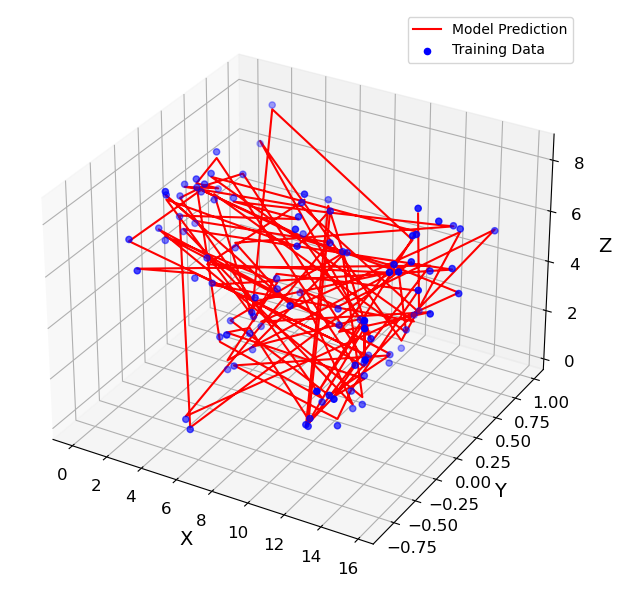

In [20]:
# Prepare the data for plotting
# A
# 
scat_x = X_train.iloc[:, 0].values  # X-axis values
scat_y = X_train.iloc[:, 1].values  # Y-axis values
scat_z = y_train.values  # Actual Z-axis values (training data)

# Predict Z-axis values using the optimal model for the same X, Y coordinates
fit_z = optimal_gb_model.predict(X_train)

# 
plotscatter3Ddata(scat_x, scat_y, fit_z, scat_x, scat_y, scat_z)


### Create Optimal RandomForestRegressor Model

In [21]:


# 
optimal_rf_params = grid_search_rf_final.best_params_

# Create the optimal RandomForestRegressor model
optimal_rf_model = RandomForestRegressor(**optimal_rf_params)

# Fit the model to the training data
optimal_rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, min_samples_split=3, n_estimators=90)

### Plot Model Predictions for Training Set

Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.

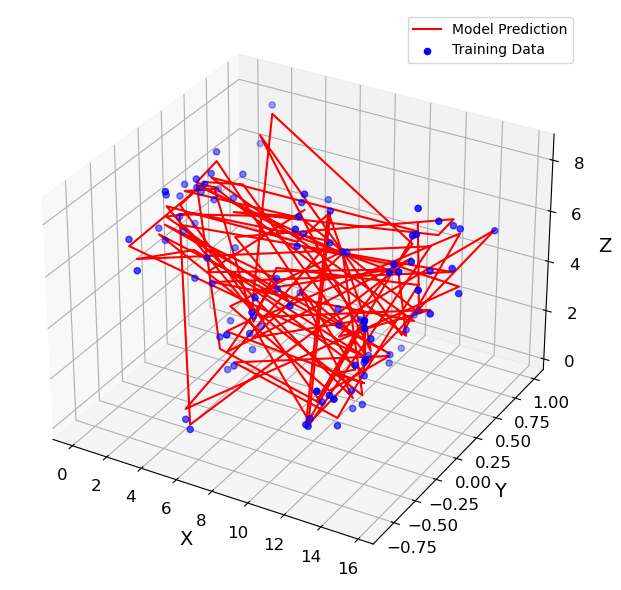

In [22]:
# 
# 
# 
scat_x = X_train.iloc[:, 0].values  #
scat_y = X_train.iloc[:, 1].values  # 
scat_z = y_train.values             #

# Predict Z-axis values using the optimal model for the same X, Y coordinates
fit_z = optimal_rf_model.predict(X_train)

# 
# This will plot the actual training data points alongside the model's prediction curve
plotscatter3Ddata(scat_x, scat_y, fit_z, scat_x, scat_y, scat_z)


### Create Optimal DecisionTreeRegressor Model

In [23]:


# 
optimal_dt_params = grid_search_dt_final.best_params_

# Create the optimal DecisionTreeRegressor model
optimal_dt_model = DecisionTreeRegressor(**optimal_dt_params)

# Fit the model to the training data
optimal_dt_model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, min_samples_split=7)

### Plot Model Predictions for Training Set

Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.

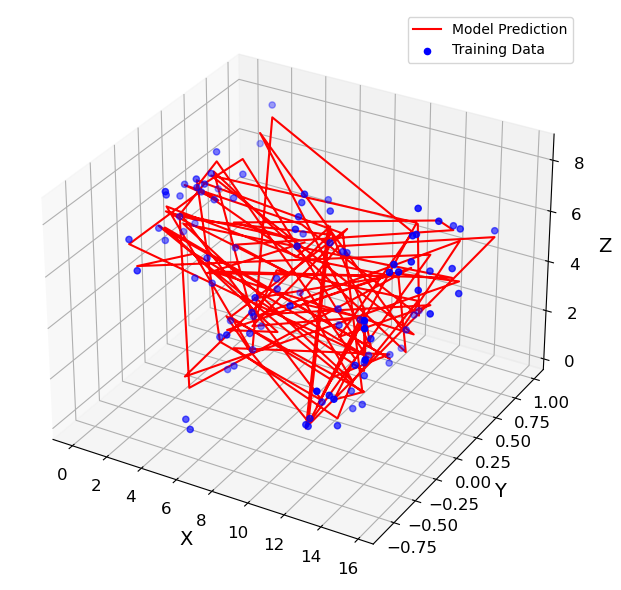

In [24]:
# 
# 
# 
scat_x = X_train.iloc[:, 0].values  # 
scat_y = X_train.iloc[:, 1].values  # 
scat_z = y_train.values             # 

# Use the optimal model to predict Z-axis values based on the x, y coordinates
fit_z = optimal_dt_model.predict(X_train)

# 
plotscatter3Ddata(scat_x, scat_y, fit_z, scat_x, scat_y, scat_z)


# Compute Generalization Error

Compute the generalization error for each of the optimal models computed above.  Use MSE as the generalization error metric.  Round your answers to four decimal places.  Print the generalization error for all three models.

In [25]:
from sklearn.metrics import mean_squared_error
# 
# 

# Predictions on the test set for GradientBoostingRegressor
y_pred_gb = optimal_gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)

# Predictions on the test set for RandomForestRegressor
y_pred_rf = optimal_rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Predictions on the test set for DecisionTreeRegressor
y_pred_dt = optimal_dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Print the generalization errors, rounded to four decimal places
print(f"GradientBoostingRegressor Generalization Error (MSE): {mse_gb:.4f}")
print(f"RandomForestRegressor Generalization Error (MSE): {mse_rf:.4f}")
print(f"DecisionTreeRegressor Generalization Error (MSE): {mse_dt:.4f}")


GradientBoostingRegressor Generalization Error (MSE): 0.6862
RandomForestRegressor Generalization Error (MSE): 0.4849
DecisionTreeRegressor Generalization Error (MSE): 0.8234
